In [1]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import plotly.tools
import seaborn as sns
import warnings
import plotly.express as px

warnings.filterwarnings('ignore')

In [2]:
def low_pass_filter(sequence, sampling_frequency, cut_frequency, n):
    nyq = 0.5 * sampling_frequency
    cutoff = cut_frequency / nyq
    b, a = signal.butter(n, cutoff)
    return signal.filtfilt(b, a, sequence)

In [3]:
data = pd.read_csv("sc1_ss_LF.csv")
data.ts = pd.to_datetime(data.ts, format='%Y-%m-%d %H:%M:%S.%f%z')

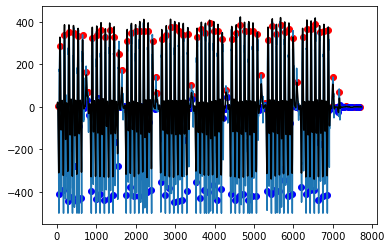

In [7]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(raw := data.gx)
ax.plot(filtered:=low_pass_filter(data.gx, 0.2, 0.005, 3), c="black")


local_maximum = signal.find_peaks(filtered)[0]
local_minimum = signal.find_peaks(-filtered)[0]

ax.scatter(x=local_maximum, y=raw[local_maximum], c="red")
ax.scatter(x=local_minimum, y=raw[local_minimum], c="blue")

ax.set_ylim(min(min(raw), min(filtered)) - 50, max(max(raw), max(filtered)) + 50)
plotly_fig = plotly.tools.mpl_to_plotly(fig)
fig

<AxesSubplot:ylabel='Density'>

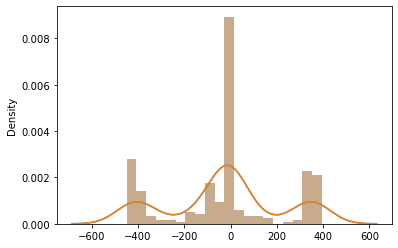

In [5]:
local_extremum = np.append(local_minimum, local_maximum)
sns.distplot([raw[i] for i in local_extremum])
sns.distplot([raw[i] for i in local_extremum])

In [6]:
px.line(raw)